
Anexo al trabajo académico: Estudio del modelo de Ising en una dimension empleando simulaciones computacionales

Por: Debinamaca Ainoo, Marcos Molina, Matilde Osa, Mateo Regal, Marco Nieto y Lluís Mompó

La configuración y programación del modelo de Ising 1D se ha realizado mediante el lenguaje de programación Python. La parte numérica del programa se ha implementado utilizando el algoritmo de Metropolis basado en el método de Montecarlo.

Importamos los siguientes paquetes:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd 
import sympy as sp

## PARTE ANALÍTICA

Cálculo de la energía sin campo externo por partícula

In [2]:
beta,J,k_b,N,T,h = sp.symbols('beta,J,k_b,N,T,h') #definimos simbólicamente las variables de las ecuaciones

autovalor1 = sp.exp(beta*J)*(sp.cosh(beta*h)+sp.sqrt(sp.sinh(beta*h)**2+sp.exp(-4*beta*J))) #partimos del autovalor calculado teóricamente
lnz = N*sp.log(autovalor1) #calculamos lnz
E = -sp.diff(lnz,beta) #Hallamos la energía derivando lnz respecto de beta (con signo negativo)
E = sp.simplify(E)
eh_0 = E.subs(h,0) 
eh_0 = sp.simplify(eh_0/N)
eh_0 #Expresión de la energía sin campo por partícula

J*(-sqrt(exp(-4*J*beta))*exp(4*J*beta) + 1)/(sqrt(exp(-4*J*beta))*exp(4*J*beta) + 1)

Cálculo de la energía con campo externo por partícula

In [3]:
e = E/N #recuperamos el valor de E en que aún no se ha establecido el campo externo como 0. 
e = sp.simplify(e) 
e #Expresión de la energía con campo por partícula

-(J*sqrt(sinh(beta*h)**2 + exp(-4*J*beta))*exp(4*J*beta)*cosh(beta*h) + J*exp(4*J*beta)*sinh(beta*h)**2 - J + h*sqrt(sinh(beta*h)**2 + exp(-4*J*beta))*exp(4*J*beta)*sinh(beta*h) + h*exp(4*J*beta)*sinh(2*beta*h)/2)/(sqrt(sinh(beta*h)**2 + exp(-4*J*beta))*exp(4*J*beta)*cosh(beta*h) + exp(4*J*beta)*sinh(beta*h)**2 + 1)

Cálculo de la capacidad calorífica sin campo externo por partícula

In [4]:
#hallamos c derivando e (sin campo) respecto de T (se ha aplicado la regla de la cadena)
c = -k_b*beta**2*sp.simplify(sp.diff(eh_0,beta)) 
c = c/(N)
c #Expresión de la capacidad calorífica sin campo por partícula

4*J**2*beta**2*k_b*sqrt(exp(-4*J*beta))*exp(4*J*beta)/(N*(sqrt(exp(-4*J*beta))*exp(4*J*beta) + 1)**2)

Cálculo de la capacidad calorífica con campo externo por partícula

In [5]:
 #hallamos c derivando e (con campo) respecto de T (se ha aplicado la regla de la cadena)
c_h = -k_b*beta**2*sp.simplify(sp.diff(e, beta))
c_h = c_h/(N)
c_h #Expresión de la capacidad calorífica con campo por partícula

beta**2*k_b*sqrt(sinh(beta*h)**2 + exp(-4*J*beta))*(8*J**2*sqrt(sinh(beta*h)**2 + exp(-4*J*beta))*exp(4*J*beta)*sinh(beta*h)**2 + 8*J**2*exp(4*J*beta)*sinh(beta*h)**2*cosh(beta*h) + 4*J**2*cosh(beta*h) + 8*J*h*sqrt(sinh(beta*h)**2 + exp(-4*J*beta))*exp(4*J*beta)*sinh(beta*h)*cosh(beta*h) + 8*J*h*exp(4*J*beta)*sinh(beta*h)**3 + 4*J*h*exp(4*J*beta)*sinh(beta*h) + 4*J*h*sinh(beta*h) + 2*h**2*sqrt(sinh(beta*h)**2 + exp(-4*J*beta))*exp(4*J*beta)*sinh(beta*h)**2 + 2*h**2*sqrt(sinh(beta*h)**2 + exp(-4*J*beta))*exp(4*J*beta) + 2*h**2*exp(4*J*beta)*sinh(beta*h)**2*cosh(beta*h) + h**2*exp(4*J*beta)*cosh(beta*h) + h**2*cosh(beta*h))*exp(4*J*beta)/(N*(exp(4*J*beta)*sinh(beta*h)**2 + 1)*(sqrt(sinh(beta*h)**2 + exp(-4*J*beta))*exp(4*J*beta)*cosh(beta*h) + exp(4*J*beta)*sinh(beta*h)**2 + 1)**2)

Cálculo de la magnetización por partícula

In [6]:
b, h = sp.symbols('b h') #definimos nuevas variables para reescribir lnz con ellas
lnz_b = lnz.subs(beta*h, b)
M = sp.simplify(sp.diff(lnz_b, b)) #hallamos la magnetización derivando lnz respecto de b
m = M.subs(k_b*T,1/beta).subs(b, beta*h)/N
m #Expresión de la magnetización por partícula

sinh(beta*h)/sqrt(sinh(beta*h)**2 + exp(-4*J*beta))

Cálculo de la susceptibilidad magnética por partícula

In [7]:
X = sp.simplify(sp.diff(m,h)) #hallamos la susceptibilidad magnética derivando m respecto de h
x = X/(N)
x #Expresión de la susceptibilidad magnética por partícula

beta*sqrt(sinh(beta*h)**2 + exp(-4*J*beta))*exp(4*J*beta)*cosh(beta*h)/(N*(exp(8*J*beta)*sinh(beta*h)**4 + 2*exp(4*J*beta)*sinh(beta*h)**2 + 1))

Graficamos las magnitudes con campo externo definidas anteriormente para un intervalo de T entre 0 y 10, para distintos valores del campo magnético indicados en aches1 y aches2.

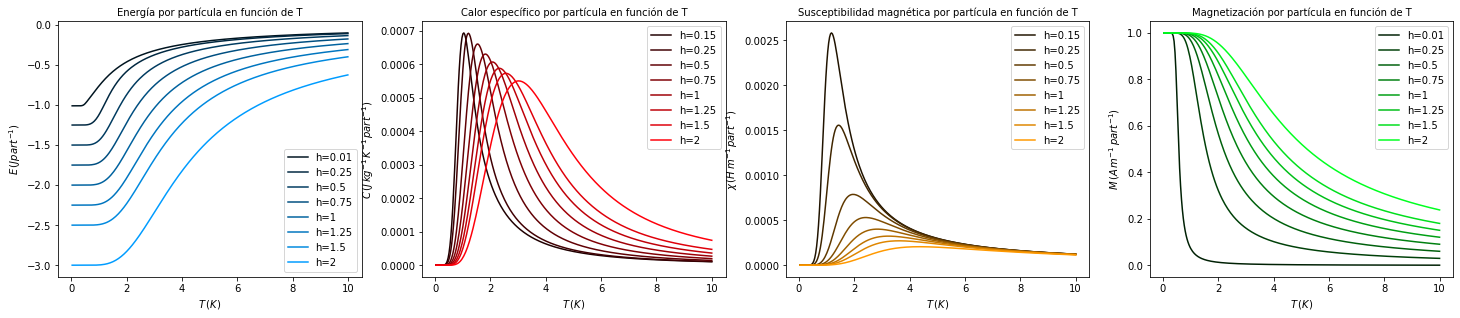

In [8]:
Tnlargo= np.linspace(0,10,300)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25,4.7))

#valores de intensidad de campo magnético
aches1 = [1e-2,0.25,0.5,0.75,1,1.25,1.5,2]
aches2 = [0.15,0.25,0.5,0.75,1,1.25,1.5,2]

#listas de colores para las gráficas
cols1=['#001420','#002740','#003b60', '#004e80', '#00629f', '#0075bf' ,'#0089df','#009cff']
cols2=['#200001','#400003','#600004','#800005','#9F0007','#BF0008','#DF000A','#FF000B']
cols3=['#201300','#402600','#603900','#804D00','#9F6000','#BF7300','#DF8600','#FF9900'] 
cols4=['#002004','#004008','#00600C','#008010','#009F14','#00BF18','#00DF1C','#00FF20']
      
#graficamos las expresiones de la energía por particula empleando bucles
ax1.set_title('Energía por partícula en función de T', fontsize = 10)
ax1.set(xlabel='$T \,(K)$', ylabel='$E \,(J part^{-1}) $')
for i in range(len(aches1)):
    e_ = e.subs(beta,1/(k_b*T)).subs(J,1).subs(h,aches1[i]).subs(k_b,1)
    Eh = []
    for j in range(len(Tnlargo)):
        Eh.append(e_.subs(T,Tnlargo[j]))
    ax1.plot(Tnlargo,Eh, f'{cols1[i]}', label = f'h={aches1[i]}') 
ax1.legend(loc='lower right')

#graficamos las expresiones del calor específico por particula empleando bucles
ax2.set_title('Calor específico por partícula en función de T', fontsize = 10)
ax2.set(xlabel='$T \,(K)$', ylabel='$C \,(J \, kg^{-1} \,K^{-1} \,part^{-1})$')
for i in range(len(aches2)):
    c_h_ = c_h.subs(beta,1/(k_b*T)).subs(J,1).subs(k_b,1).subs(N,1000).subs(h,aches2[i])
    Ch = []
    for j in range(len(Tnlargo)):
        Ch.append(c_h_.subs(T,Tnlargo[j]))
    ax2.plot(Tnlargo,Ch, f'{cols2[i]}', label = f'h={aches2[i]}')
ax2.legend(loc='upper right')

#graficamos las expresiones de la susceptibilidad magnética por particula empleando bucles
ax3.set_title('Susceptibilidad magnética por partícula en función de T', fontsize = 10)
ax3.set(xlabel='$T \,(K)$', ylabel='$\chi \, (H \, m^{-1} \, part^{-1})$')
for i in range(len(aches2)):
    xh_ = x.subs(beta,1/(k_b*T)).subs(J,1).subs(h,aches2[i]).subs(N,1000).subs(k_b,1)
    Xh = []
    for j in range(len(Tnlargo)):
        Xh.append(xh_.subs(T,Tnlargo[j]))
    ax3.plot(Tnlargo,Xh, f'{cols3[i]}', label = f'h={aches2[i]}')
ax3.legend(loc='upper right')

#graficamos las expresiones de la magnetización por particula empleando bucles
ax4.set_title('Magnetización por partícula en función de T', fontsize = 10)
ax4.set(xlabel='$T \,(K)$', ylabel='$M \, (A \, m^{-1} \, part^{-1}) $')
for i in range(len(aches1)):
    m_ = m.subs(beta,1/(k_b*T)).subs(J,1).subs(h,aches1[i]).subs(k_b,1)
    Mh = []
    for j in range(len(Tnlargo)):
        Mh.append(m_.subs(T,Tnlargo[j]))
    ax4.plot(Tnlargo,Mh, f'{cols4[i]}', label = f'h={aches1[i]}')
ax4.legend(loc='upper right')
plt.legend()
plt.show()

## PARTE NUMÉRICA

Definimos una función que nos calcula las magnitudes utilizando el algoritmo de Metropolis. Esta función recibe como datos de entrada la constante de Boltzmann, la constante de acoplamiento J, el número de partículas N y el número de iteraciones del algoritmo.

In [28]:
def Ising1D_sincampo(kb,J,T,N,itera):
    s = [1] #vector de espines inicializado en el estado fundamental (todos los espines apuntan en la misma dirección)
    s *= N #Tantos espines como partículas
    suma0 = 0
    for i in range(len(s)-1):
        suma0+=s[i]*s[i+1]
    suma0+=s[-1]*s[0]
    E = -J*suma0 #Calculamos la energía total del sistema
    n = 0 #número iteraciones
    E_s=[] #vector que almacena las energías en cada configuración
    M=[] #un vector que almacena la magnetización de cada configuración
    while n<itera*N:
        r = rnd.randint(0,N-1)
        s[r]*=-1  #se elige un espín al azar y se cambia su valor
        suma1 = 0
        for i in range(len(s)-1):
            suma1+=s[i]*s[i+1]
        suma1+=s[-1]*s[0]
        E1 = -J*suma1  #Se calcula la energía de la nueva configuración
        dE = E1-E
        if dE <=0:
            E += dE #se acepta el cambio
        elif dE>0:
            p = np.exp(-dE/(kb*T)) #se acepta el cambio con la probabilidad p
            t = rnd.random() #generamos num aleatorio
            if t<=p:
                E += dE #se acepta el cambio

            else:
                s[r]*=-1 #no se acepta el cambio

        E_s.append(E) #almacenamos la energía
        M.append(np.mean(s)) #almacenamos la magnetización
        n+=1

    E_s2 = []  #se crea un vector donde se almacena la energía al cuadrado por partícula
    for i in range(len(E_s)):
        E_s2.append((E_s[i]/N)**2) 
    E_s2media = np.mean(E_s2)  
    c = (E_s2media-(np.mean(E_s)/N)**2)/(kb*T**2) #capacidad calorífica
    
    M_ = np.mean(M) #magnetización media
    sum = 0
    for i in range(len(M)):
        sum+=M[i]**2
    M_2 = sum/len(M)
    X = (M_2-M_**2)/(T*kb) #susceptibilidad
    
    mcs = n #total de intentos de cambio por espín
    r = len(M) #iteraciones en las que el cambio fue aceptado
    rpc = (r/mcs)*100
    
    return np.mean(E_s)/N, c, X, M_

Definimos una función que grafica los resultados de la función anterior junto con sus curvas analíticas asociadas:

In [29]:
def Ising1d_plot_sincampo(kb,J,valueN,arrayT,itera):
    E_T = []
    C_T = []
    X_T = []
    M_T = []
    
    #llamamos a la función que calcula el algoritmo de ising sin campo con cada uno de los diferentes valores de T
    for i in range(len(arrayT)):
        E_media, C, X, M = Ising1D_sincampo(kb,J,arrayT[i],valueN,itera) 
        E_T.append(E_media)
        C_T.append(C)
        X_T.append(X)
        M_T.append(M)
        
        
    #Graficamos los valores obtenidos

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25,4.7))
    beta,J,k_b,N,T,h = sp.symbols('beta,J,k_b,N,T,h')
    #graficamos las expresiones de la energía por particula empleando bucles
    ax1.set_title('Energía por partícula en función de T', fontsize = 10)
    ax1.set(xlabel='$T \,(K)$', ylabel='$E \,(J \, part^{-1}) $')
    ax1.plot(arrayT,E_T)
    eh_0_ = eh_0.subs(beta,1/(k_b*T)).subs(J,1).subs(h,1.5).subs(k_b,1)
    Eh_0 = []
    for i in range(len(arrayT)):
        Eh_0.append(eh_0_.subs(T,arrayT[i]))
    ax1.plot(arrayT,Eh_0, 'k') 
    #graficamos las expresiones del calor específico por particula empleando bucles
    ax2.set_title('Calor específico por partícula en función de T', fontsize = 10)
    ax2.set(xlabel='$T \,(K)$', ylabel='$C \,(J \, kg^{-1} \,K^{-1} \,part^{-1})$')
    ax2.plot(arrayT,C_T, 'tab:red')
    cnoh = c.subs(beta,1/(k_b*T)).subs(J,1).subs(N,valueN).subs(k_b,1)
    Ch_0 = []
    for i in range(len(arrayT)):
        Ch_0.append(cnoh.subs(T,arrayT[i]))
    ax2.plot(arrayT,Ch_0, 'k')
    #graficamos las expresiones de la susceptibilidad magnética por particula empleando bucles
    ax3.set_title('Susceptibilidad magnética por partícula en función de T', fontsize = 10)
    ax3.set(xlabel='$T \,(K)$', ylabel='$\chi \, (H \, m^{-1} \, part^{-1})$')
    ax3.plot(arrayT,X_T, 'tab:orange')
    xnoh = x.subs(beta,1/(k_b*T)).subs(J,1).subs(N,valueN).subs(k_b,1)
    Xh_0 = []
    for i in range(len(arrayT)):
        Xh_0.append(xnoh.subs(T,arrayT[i]).subs(h,1e-2))
    ax3.plot(arrayT,Xh_0, 'k') 
    #graficamos las expresiones de la magnetización por particula empleando bucles
    ax4.set_title('Magnetización por partícula en función de T', fontsize = 10)
    ax4.set(xlabel='$T \,(K)$', ylabel='$M \, (A \, m^{-1} \, part^{-1}) $')
    ax4.plot(arrayT,M_T, 'tab:green')
    m_ = m.subs(beta,1/(k_b*T)).subs(J,1).subs(k_b,1)
    Mh_0 = []
    for i in range(len(arrayT)):
        Mh_0.append(m_.subs(T,arrayT[i]).subs(h,3e-3))
    ax4.plot(arrayT,Mh_0, 'k') 

A continuación, definimos cuántas partículas queremos poner y cuantas iteraciones queremos realizar y se realizaran las gráficas para campo externo nulo.

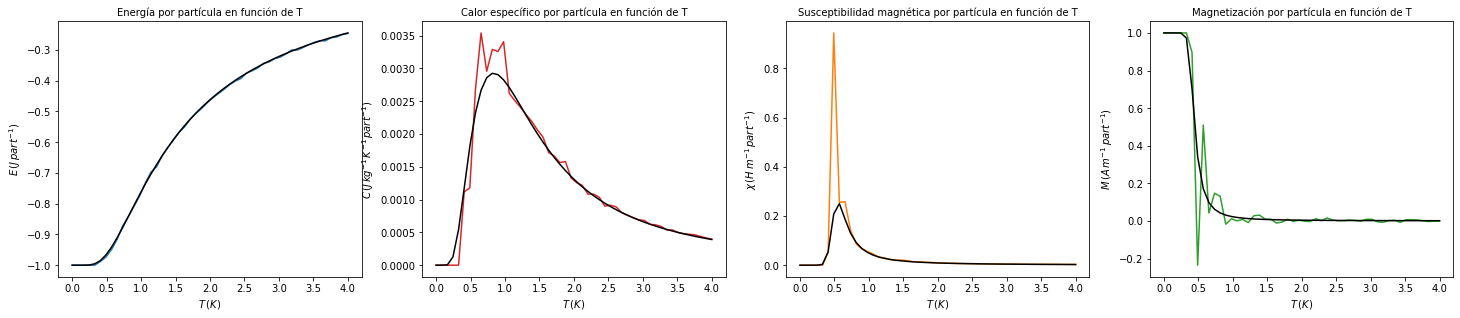

In [30]:
N = 150
J=1
kb=1
itera = 1500
T = np.linspace(1e-5,4,50) 
Ising1d_plot_sincampo(kb,J,N, T, itera)

La siguiente función realiza el mismo algoritmo de metropolis que la función Ising1D_sincampo, pero añadiendo un campo magnético de valor h

In [31]:
def Ising1D_concampo(kb,J,T,N,h, itera):
    s = [1] #vector de espines inicializado en el estado fundamental (todos los espines apuntan en la misma dirección)
    s *= N #Tantos espines como partículas
    suma0 = 0
    sumh = 0
    for i in range(len(s)-1):
        suma0+=s[i]*s[i+1]
    suma0+=s[-1]*s[0]
    for i in range(len(s)):
        sumh+=s[i]
    E = -J*suma0-h*sumh #Calculamos la energía total del sistema
    n = 0 #número iteraciones
    E_s=[] #vector que almacena las energías en cada configuración
    M=[] #un vector que almacena la magnetización de cada configuración
    while n<itera*N:
        r = rnd.randint(0,N-1)
        s[r]*=-1  #se elige un espín al azar y se cambia su valor
        suma1 = 0
        sumh1 = 0
        for i in range(len(s)-1):
            suma1+=s[i]*s[i+1]
        suma1+=s[-1]*s[0]
        for i in range(len(s)):
            sumh1 += s[i]
        E1 = -J*suma1-h*sumh1  #Se calcula la energía de la nueva configuración
        dE = E1-E
        if dE <=0:
            E += dE #se acepta el cambio
        elif dE>0:
            p = np.exp(-dE/(kb*T)) #se acepta el cambio con la probabilidad p
            t = rnd.random() #generamos num aleatorio
            if t<=p:
                E += dE #se acepta el cambio

            else:
                s[r]*=-1 #no se acepta el cambio

        E_s.append(E) #almacenamos la energía
        M.append(np.mean(s)) #almacenamos la magnetización
        n+=1

    E_s2 = []  #se crea un vector donde se almacena la energía al cuadrado por partícula
    for i in range(len(E_s)):
        E_s2.append((E_s[i]/N)**2) 
    E_s2media = np.mean(E_s2)  
    c = (E_s2media-(np.mean(E_s)/N)**2)/(kb*T**2) #capacidad calorífica
    
    M_ = np.mean(M) #magnetización media
    sum = 0
    for i in range(len(M)):
        sum+=M[i]**2
    M_2 = sum/len(M)
    X = (M_2-M_**2)/(T*kb) #susceptibilidad
    
    mcs = n #total de intentos de cambio por espín
    r = len(M) #iteraciones en las que el cambio fue aceptado
    rpc = (r/mcs)*100
    
    return np.mean(E_s)/N, c, X, M_

De la misma manera, esta función gráfica los resultados del modelo de metropolis con campo externo junto con sus curvas analíticas asociadas. 

In [32]:
def Ising1d_plot_concampo(kb,J,valueN,h,arrayT,itera):
    E_T = []
    C_T = []
    X_T = []
    M_T = []
    
    #llamamos a la función que calcula el algoritmo de ising sin campo con cada uno de los diferentes valores de T
    for i in range(len(arrayT)):
        E_media, C, X, M = Ising1D_concampo(kb,J,arrayT[i],valueN,h,itera)
        E_T.append(E_media)
        C_T.append(C)
        X_T.append(X)
        M_T.append(M)
    
    #Graficamos los valores obtenidos
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25,4.7))
    beta,J,k_b,N,T,h = sp.symbols('beta,J,k_b,N,T,h') 
    #graficamos las expresiones de la energía por particula empleando bucles
    ax1.set_title('Energía por partícula en función de T', fontsize = 10)
    ax1.set(xlabel='$T \,(K)$', ylabel='$E \,(J part^{-1}) $')
    ax1.plot(arrayT,E_T)
    eh = e.subs(beta,1/(k_b*T)).subs(J,1).subs(h,1.5).subs(k_b,1)
    Eh = []
    for i in range(len(arrayT)):
        Eh.append(eh.subs(T,arrayT[i]))
    ax1.plot(arrayT,Eh, 'k') 
    #graficamos las expresiones del calor específico por particula empleando bucles
    ax2.set_title('Calor específico por partícula en función de T', fontsize = 10)
    ax2.set(xlabel='$T \,(K)$', ylabel='$C \,(J \, kg^{-1} \,K^{-1} \,part^{-1})$')
    ax2.plot(arrayT,C_T, 'tab:red')
    c_h_ = c_h.subs(beta,1/(k_b*T)).subs(J,1).subs(h,1.5).subs(k_b,1).subs(N,valueN)
    Ch = []
    for i in range(len(arrayT)):
        Ch.append(c_h_.subs(T,arrayT[i]))
    ax2.plot(arrayT,Ch, 'k')
    #graficamos las expresiones de la susceptibilidad magnética por particula empleando bucles
    ax3.set_title('Susceptibilidad magnética por partícula en función de T', fontsize = 10)
    ax3.set(xlabel='$T \,(K)$', ylabel='$\chi \, (H \, m^{-1} \, part^{-1})$')
    ax3.plot(arrayT,X_T, 'tab:orange')
    xh_ = x.subs(beta,1/(k_b*T)).subs(J,1).subs(h,1.5).subs(N,valueN).subs(k_b,1)
    Xh = []
    for i in range(len(arrayT)):
        Xh.append(xh_.subs(T,arrayT[i]))
    ax3.plot(arrayT,Xh, 'k')
    #graficamos las expresiones de la magnetización por particula empleando bucles
    ax4.set_title('Magnetización por partícula en función de T', fontsize = 10)
    ax4.set(xlabel='$T \,(K)$', ylabel='$M \, (A \, m^{-1} \, part^{-1}) $')
    ax4.plot(arrayT,M_T, 'tab:green')
    mh = m.subs(beta,1/(k_b*T)).subs(J,1).subs(h,1.5).subs(k_b,1)
    Mh = []
    for i in range(len(arrayT)):
        Mh.append(mh.subs(T,arrayT[i]))
    ax4.plot(arrayT,Mh, 'k')
    

Introducimos los valores del número de partículas, número de iteraciones y el valor de campo magnético y graficamos las curvas con campo magnético externo.

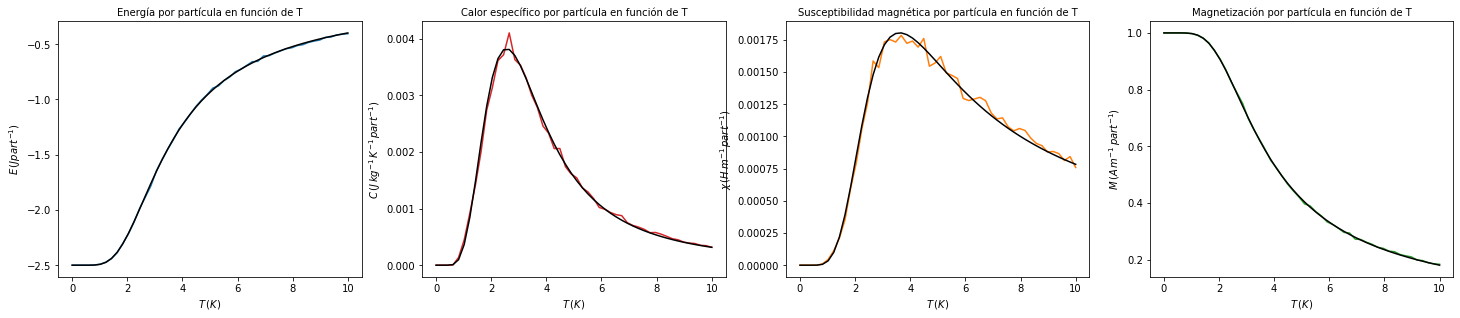

In [33]:
N = 150
J=1
kb=1
itera = 1500
T = np.linspace(1e-5,10,50) 
h = 1.5
Ising1d_plot_concampo(kb,J,N,h,T,itera)

Se define una función que grafica diferentes casos de número de partículas con sus respectivas curvas analíticas para la susceptibilidad magnética y calor específico con campo externo nulo.

In [34]:
def sincampo_variapartic(kb, J, arrayT, arrayN, itera):
    C_Ts = []
    X_Ts = []
    colors = ['red', 'blue', 'green', 'orange']
    darkcolors = ['#430000', '#001743', '#004300', '#432E00']
    
    #llamamos a la función que calcula el algoritmo de ising sin campo con cada uno de los diferentes valores de N y de T
    for j in range(len(arrayN)):
        C_T = []
        X_T = []
        for i in range(len(arrayT)):
            E_media, C, X, M = Ising1D_sincampo(kb,J,arrayT[i],arrayN[j], itera)
            C_T.append(C)
            X_T.append(X)
        C_Ts.append(C_T)
        X_Ts.append(X_T)

    #Graficamos los valores obtenidos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5,4.7))
    beta,J,k_b,N,T,h = sp.symbols('beta,J,k_b,N,T,h')
    #graficamos las expresiones del calor específico por particula empleando bucles
    ax1.set_title('Calor específico por partícula en función de T', fontsize = 10)
    ax1.set(xlabel='$T \,(K)$', ylabel='$C \,(J \, kg^{-1} \,K^{-1} \,part^{-1})$')
    for i in range(len(arrayN)):
        ax1.plot(arrayT,C_Ts[i], f'tab:{colors[i]}', label = f'N = {arrayN[i]}')
        cnoh = c.subs(beta,1/(k_b*T)).subs(J,1).subs(N,arrayN[i]).subs(k_b,1)
        Ch_0 = []
        for j in range(len(arrayT)):
            Ch_0.append(cnoh.subs(T,arrayT[j]))
        ax1.plot(arrayT,Ch_0, f'{darkcolors[i]}', linestyle='dashed')
    ax1.legend(loc='upper right')
    #graficamos las expresiones de la susceptibilidad magnética por particula empleando bucles
    ax2.set_title('Susceptibilidad magnética por partícula en función de T', fontsize = 10)
    ax2.set(xlabel='$T \,(K)$', ylabel='$\chi \, (H \, m^{-1} \, part^{-1})$')
    for i in range(len(arrayN)):  
        ax2.plot(arrayT,X_Ts[i], f'tab:{colors[i]}', label = f'N = {arrayN[i]}')
        xnoh = x.subs(beta,1/(k_b*T)).subs(J,1).subs(N,arrayN[i]).subs(k_b,1)
        Xh_0 = []
        for j in range(len(arrayT)):
            Xh_0.append(xnoh.subs(T,arrayT[j]).subs(h,1e-2))
        ax2.plot(arrayT,Xh_0, f'{darkcolors[i]}', linestyle='dashed')
        
    ax2.legend(loc='upper right')


Probamos la función anterior introduciendo como parámetro el número de iteraciones y una serie de números de partículas.

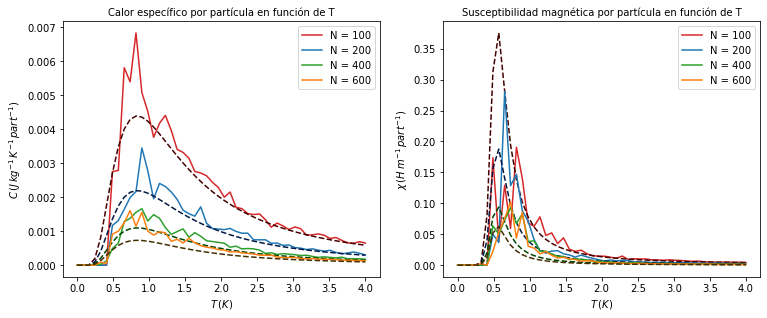

In [35]:
J=1
kb=1
itera = 300
N = [100,200,400,600]
T = np.linspace(1e-5,4,50) 
sincampo_variapartic(kb, J, T, N, itera)

Se define una función que grafica diferentes casos de número de partículas con sus respectivas curvas analíticas para la susceptibilidad magnética y calor específico con un determinado campo externo.


In [49]:
def concampo_variapartic(kb, J, arrayT, arrayN, h, itera):
    C_Ts = []
    X_Ts = []
    colors = ['red', 'blue', 'green', 'orange']
    darkcolors = ['#430000', '#001743', '#004300', '#432E00']

    #llamamos a la función que calcula el algoritmo de ising sin campo con cada uno de los diferentes valores de N y de T
    for j in range(len(arrayN)):
        C_T = []
        X_T = []
        for i in range(len(arrayT)):
            E_media, C, X, M = Ising1D_concampo(kb,J,arrayT[i],arrayN[j],h, itera)
            C_T.append(C)
            X_T.append(X)
        C_Ts.append(C_T)
        X_Ts.append(X_T)

    #Graficamos los valores obtenidos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5,4.7))
    beta,J,k_b,N,T,h = sp.symbols('beta,J,k_b,N,T,h')
    #graficamos las expresiones del calor específico por particula empleando bucles
    ax1.set_title('Calor específico por partícula en función de T', fontsize = 10)
    ax1.set(xlabel='$T \,(K)$', ylabel='$C \,(J \, kg^{-1} \,K^{-1} \,part^{-1})$')
    for i in range(len(arrayN)):
        ax1.plot(arrayT,C_Ts[i], f'tab:{colors[i]}', label = f'N = {arrayN[i]}')
        c_h_ = c_h.subs(beta,1/(k_b*T)).subs(J,1).subs(h,1.5).subs(k_b,1).subs(N,arrayN[i])
        Ch = []
        for j in range(len(arrayT)):
            Ch.append(c_h_.subs(T,arrayT[j]))
        ax1.plot(arrayT,Ch, f'{darkcolors[i]}', linestyle='dashed')
    ax1.legend(loc='upper right')
    #graficamos las expresiones de la susceptibilidad magnética por particula empleando bucles
    ax2.set_title('Susceptibilidad magnética por partícula en función de T', fontsize = 10)
    ax2.set(xlabel='$T \,(K)$', ylabel='$\chi \, (H \, m^{-1} \, part^{-1})$')
    for i in range(len(arrayN)):  
        ax2.plot(arrayT,X_Ts[i], f'tab:{colors[i]}', label = f'N = {arrayN[i]}')
        xh_ = x.subs(beta,1/(k_b*T)).subs(J,1).subs(h,1.5).subs(N,arrayN[i]).subs(k_b,1)
        Xh = []
        for j in range(len(arrayT)):
            Xh.append(xh_.subs(T,arrayT[j]))
        ax2.plot(arrayT,Xh, f'{darkcolors[i]}', linestyle='dashed')
    ax2.legend(loc='upper right')
    

Probamos la función anterior introduciendo como parámetro el número de iteraciones, el valor del campo externo y una serie de números de partículas.

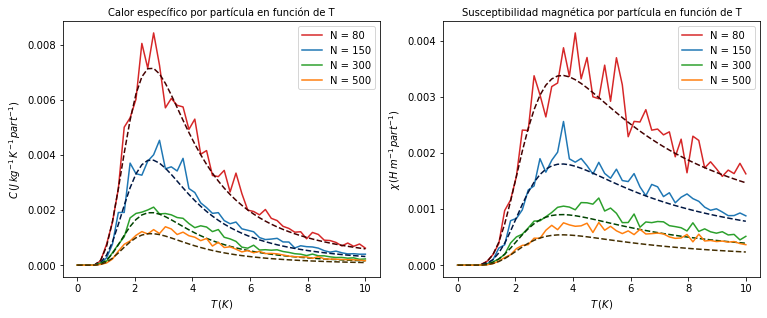

In [50]:
J=1
kb=1
itera = 175
N = [80,150,300,500]
T = np.linspace(1e-5,10,50) 
concampo_variapartic(kb, J, T, N, h, itera)